In [2]:
#윤리적 고민과 규제 도전
# -딥페이크, AI목소리

In [26]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


driver=webdriver.Chrome()
driver.get("https://www.youtube.com/")
search_box = driver.find_element(By.NAME, 'search_query') # 검색창을 찾은 후에,
search_box.send_keys('AI 노래 저작권') # Python이라고 치고,
search_box.submit() # 검색 버튼 누름
driver.find_element(By.XPATH,'//*[@id="filter-button"]/ytd-button-renderer/yt-button-shape/button').click()
driver.find_element(By.XPATH,'/html/body/ytd-app/ytd-popup-container/tp-yt-paper-dialog/ytd-search-filter-options-dialog-renderer/div[2]/ytd-search-filter-group-renderer[1]/ytd-search-filter-renderer[5]/a/div/yt-formatted-string').click() # 올해
#driver.find_element(By.XPATH,'/html/body/ytd-app/ytd-popup-container/tp-yt-paper-dialog/ytd-search-filter-options-dialog-renderer/div[2]/ytd-search-filter-group-renderer[1]/ytd-search-filter-renderer[4]/a/div').click() # 이번 달




scroll_script = "window.scrollBy(0, window.innerHeight);"

# 20초 동안 매 초마다 스크롤
for _ in range(500):
    driver.execute_script(scroll_script)
    time.sleep(0.1)
    
result=driver.find_elements(By.ID, "video-title")
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

KeyboardInterrupt: 

In [ ]:
title_list = soup.select("#video-title")
title=[]
for i in range(len(title_list)) :
    if title_list[i].get("title") :
        title.append(title_list[i].get("title"))

In [ ]:
import re
import pandas as pd
time=[]

for i in range(len(title_list)) :
    pattern = re.compile(r'(\d+)\s*(개월|년|일)\s*전')
    matches = pattern.search(str(title_list[i]))
    try :
        time.append(matches.group())
    except :
        pass

result=pd.Series(time)

In [ ]:
for i in list(result.values):
    if '년' in i :
        result.replace(i,int(i.split('년')[0])*365,inplace=True)
    elif '개월' in i :
        result.replace(i,int(i.split('개월')[0])*30,inplace=True)
    elif '일' in i :
        result.replace(i,int(i.split('일')[0]),inplace=True)


In [ ]:
result.info()

<class 'pandas.core.series.Series'>
RangeIndex: 539 entries, 0 to 538
Series name: None
Non-Null Count  Dtype
--------------  -----
539 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB


In [ ]:
# "올해"버튼 클릭했을 때
test = result.value_counts().sort_index(ascending=False)
add=test[test.index < 30].sum(axis=0)
test.drop(test[test.index < 30].index,inplace=True)
test[0]=add
x=test.index
y=test.values

In [ ]:
test

330     33
300     15
270     16
240     68
210     95
180     63
150     37
120     25
90      19
60      25
30      29
0      107
Name: count, dtype: int64

In [ ]:
# "이번 달"버튼 클릭했을 때
x=result.value_counts().sort_index(ascending=False).index
y=result.value_counts().sort_index(ascending=False).values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


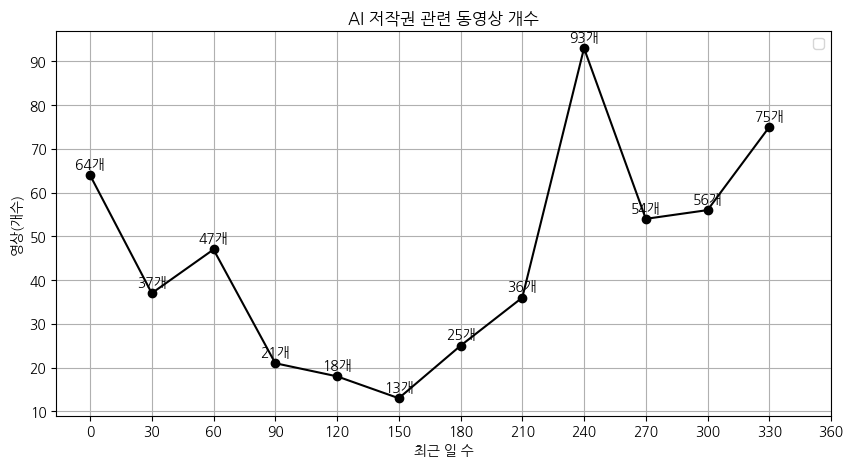

In [ ]:
from matplotlib import pyplot as plt
import koreanize_matplotlib


plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', color='black')
plt.title('AI 저작권 관련 동영상 개수')
plt.xlabel('최근 일 수')
plt.ylabel('영상(개수)')
plt.grid(True)
plt.legend()
plt.xticks(range(0,390,30),range(0,390,30))
# 주요 데이터 포인트에 텍스트 추가
for i, txt in enumerate(y):
    plt.annotate(f'{txt}개', (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


In [10]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

def make_wordcloud(title_list, stopwords, word_count):
    okt = Okt()
    sentences_tag = []
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    tag_dict = dict(tags)
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    path = r'c:\Windows\Fonts\malgun.ttf'
    img_mask = np.array(Image.open('reference.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                      background_color="white", max_font_size=200,
                      repeat=True, colormap='plasma',
                      mask=img_mask, collocations=False, max_words=50)

    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

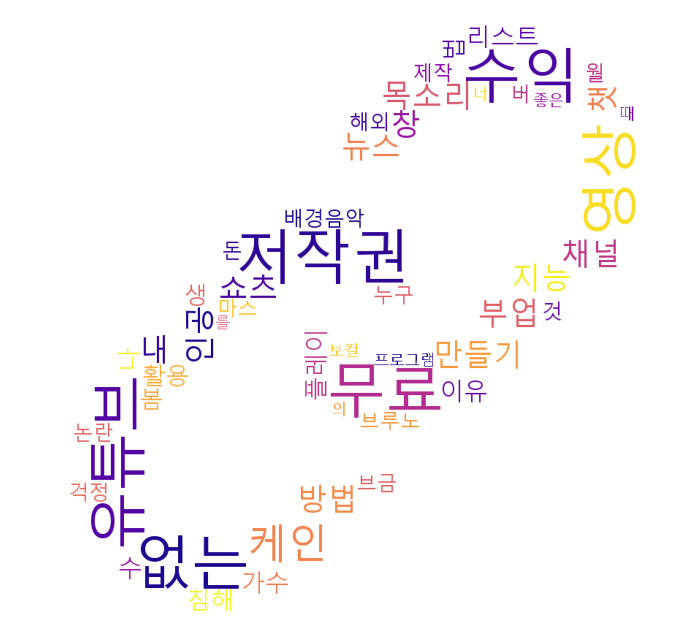

In [ ]:
stopwords = ['AI','음악','노래','작곡','커버','곡','말','월드컵','로','이','가사','위','옥','사랑','작사']
make_wordcloud(title, stopwords, 100)

In [ ]:
title

['완벽한 배경음악과 효과음을 찾아보세요',
 'AI음악 저작권, 내 것으로 만들 수 있을까? - 저작권의 비밀2',
 '감쪽같은 AI 커버 노래…저작권 문제는 없는지 알아봄｜크랩',
 'AI음악으로 수익창출, 진짜일까? - 저작권의 비밀',
 '저작권 문제없는 AI음악 만들어 수익창출까지 하는 방법',
 '소재는 있지만 동영상 편집이 어려운 당신을 위한 AI 영상 제작 솔루션',
 'AI 저작권 논란 의미 없습니다. 한마디로 종결해드립니다.',
 "브루노 마스의 '하입 보이'…'AI 커버 곡' 저작권 침해 논란? / JTBC 뉴스룸",
 '저작권 없는 음악 AI로 만드는 방법, AI 작곡 서비스 키닛 (KEENEAT)',
 "좋아하는 노래를 '내 가수' 목소리로…AI 커버 법적 책임은? (자막뉴스) / SBS",
 '해외에서 난리난 AI로 5분만에 노래를 만들어서 돈을 버는 방법 | 유튜브 자동화',
 'AI 작곡 30초컷! 페이스북 메타가 만든 AI 음악 프로그램 MusicGEN 눈 앞에서 곡 만들어드립니다! 일단 듣고 가세요~!!! 유튜브 #무료음악, 저작권, 싹다 무료ㅋㅋㅋ',
 '‘AI 시대’ 작사·작곡·보컬 ‘5분이면 뚝딱’…저작권은? / KBS 2024.01.20.',
 "137만 명 들은 '빅뱅 목소리'…유튜브에서 날아온 경고 / SBS 8뉴스",
 'AI가 작곡·편곡에 노래까지…저작권 문제는 여전 [9시 뉴스] / KBS  2023.07.02.',
 '해외에서 난리난 AI 음악으로 유튜브 수익 창출 조건 달성하기',
 "챗GPT같은 AI로 저작권 없는 음악 만들기 / 챗GPT로 '벚꽃연금', 가능할까",
 'AI로 유튜브 음악 채널을 만들었습니다?',
 '인공지능 이미지와 무료 음악으로 수익창출 하는 아주 간단한 방법 대 방출! 왕초보도 쉽게 따라할 수 있도록 상세가이드 | 직장인부업, 유튜브하는법, 돈버는법, 머니몬스터, 혼잡스',
 '작곡한다고 소개하더니 배경음악용?? 현실적으로 사용 가능한 작곡AI 소개합니다.',
 'AI 무료 작곡 프로

In [ ]:
auth_list=[]
for i in title :
    if "저작권" in i :
        auth_list.append(i)
auth_list

['AI음악 저작권, 내 것으로 만들 수 있을까? - 저작권의 비밀2',
 '감쪽같은 AI 커버 노래…저작권 문제는 없는지 알아봄｜크랩',
 'AI음악으로 수익창출, 진짜일까? - 저작권의 비밀',
 '저작권 문제없는 AI음악 만들어 수익창출까지 하는 방법',
 'AI 저작권 논란 의미 없습니다. 한마디로 종결해드립니다.',
 "브루노 마스의 '하입 보이'…'AI 커버 곡' 저작권 침해 논란? / JTBC 뉴스룸",
 '저작권 없는 음악 AI로 만드는 방법, AI 작곡 서비스 키닛 (KEENEAT)',
 'AI 작곡 30초컷! 페이스북 메타가 만든 AI 음악 프로그램 MusicGEN 눈 앞에서 곡 만들어드립니다! 일단 듣고 가세요~!!! 유튜브 #무료음악, 저작권, 싹다 무료ㅋㅋㅋ',
 '‘AI 시대’ 작사·작곡·보컬 ‘5분이면 뚝딱’…저작권은? / KBS 2024.01.20.',
 'AI가 작곡·편곡에 노래까지…저작권 문제는 여전 [9시 뉴스] / KBS  2023.07.02.',
 "챗GPT같은 AI로 저작권 없는 음악 만들기 / 챗GPT로 '벚꽃연금', 가능할까",
 '메타가 만든 저작권 걱정없는 무료 작곡 AI 솜씨좀 볼까?',
 '악보에 편곡까지 척척하는 AI...저작권·범죄는 숙제 / YTN',
 'ChatGPT를 능가하는 AI 작곡가를 소개합니다 | AI 뮤직으로 저작권 걱정 없는 유튜브 채널도 개설 가능',
 'AI 활용한 음악, 그림은 저작권 위반이 될까 아닐까?',
 "MJ가 부른 '큐피드' 음색 미쳤다..그런데! (Feat.커버송 저작권)",
 'AI 커버 노래 저작권 수익은 누구에게? "구글이 나섰다" | AI cover kpop',
 '인기 끄는 \'AI 커버곡\'…"저작권·실연권 침해" / 연합뉴스TV (YonhapnewsTV)',
 '음악저작권협회 "AI 저작권 학습 무제한 허용에 반대" / YTN 사이언스',
 'AI가 커버한 노래 저작권은?',
 'AI가 작곡·편곡에 노래까지…저작권 문제는 여전 / KBS  2023.07.03.'

In [16]:
auth_list=['AI음악 저작권, 내 것으로 만들 수 있을까? - 저작권의 비밀2',
 '감쪽같은 AI 커버 노래…저작권 문제는 없는지 알아봄｜크랩',
 'AI음악으로 수익창출, 진짜일까? - 저작권의 비밀',
 '저작권 문제없는 AI음악 만들어 수익창출까지 하는 방법',
 'AI 저작권 논란 의미 없습니다. 한마디로 종결해드립니다.',
 "브루노 마스의 '하입 보이'…'AI 커버 곡' 저작권 침해 논란? / JTBC 뉴스룸",
 '저작권 없는 음악 AI로 만드는 방법, AI 작곡 서비스 키닛 (KEENEAT)',
 'AI 작곡 30초컷! 페이스북 메타가 만든 AI 음악 프로그램 MusicGEN 눈 앞에서 곡 만들어드립니다! 일단 듣고 가세요~!!! 유튜브 #무료음악, 저작권, 싹다 무료ㅋㅋㅋ',
 '‘AI 시대’ 작사·작곡·보컬 ‘5분이면 뚝딱’…저작권은? / KBS 2024.01.20.',
 'AI가 작곡·편곡에 노래까지…저작권 문제는 여전 [9시 뉴스] / KBS  2023.07.02.',
 "챗GPT같은 AI로 저작권 없는 음악 만들기 / 챗GPT로 '벚꽃연금', 가능할까",
 '메타가 만든 저작권 걱정없는 무료 작곡 AI 솜씨좀 볼까?',
 '악보에 편곡까지 척척하는 AI...저작권·범죄는 숙제 / YTN',
 'ChatGPT를 능가하는 AI 작곡가를 소개합니다 | AI 뮤직으로 저작권 걱정 없는 유튜브 채널도 개설 가능',
 'AI 활용한 음악, 그림은 저작권 위반이 될까 아닐까?',
 "MJ가 부른 '큐피드' 음색 미쳤다..그런데! (Feat.커버송 저작권)",
 'AI 커버 노래 저작권 수익은 누구에게? "구글이 나섰다" | AI cover kpop',
 '인기 끄는 \'AI 커버곡\'…"저작권·실연권 침해" / 연합뉴스TV (YonhapnewsTV)',
 '음악저작권협회 "AI 저작권 학습 무제한 허용에 반대" / YTN 사이언스',
 'AI가 커버한 노래 저작권은?',
 'AI가 작곡·편곡에 노래까지…저작권 문제는 여전 / KBS  2023.07.03.',
 '저작권 없는 뮤직비디오 만드는 방법 노래, 립싱크, 랩 가능 | AI 툴 BeatBot, Adobe',
 '작곡 AI로 텍스트 to AI 음악 만들기, 근데 저작권  걱정은 없을까?',
 "'하입보이' 부른 브루노 마스?…AI가 만든 노래, 저작권은? / JTBC 상암동 클라스",
 '무료 작곡 AI로 1분만에 저작권 없는 음악 작곡하기',
 '유튜브 음원 저작권 AI 감지 테스트 | YouTube Music Copyright AI Detection Test by Tonic Music',
 "최애 목소리로 AI 커버 만들면 '저작권'은 누구한테 갈까 / SBS / 모아보는 뉴스",
 'AI그림 저작권 얻을 수 있나? 미법원에서 첫 판결 나옴!',
 '심화되는 AI 저작권 논란, 미국 저작권청의 결정은?',
 '길거리 캐럴 왜 안 들리나 했더니…저작권 때문 아니다? / SBS / 실시간 e뉴스',
 'AI가 만든 음악...저작권은 어떻게?',
 '저작권 걱정없는 유료 음원사이트 1위 - Artlist 특징 및 사용법. 무료 vs. 유료 음원? 유튜브에서 음악 사용할 때. 아트리스트 2개월 추가 혜택받기',
 'AI가 그린 만화책은 어떤 모습?...저작권·일자리 논쟁 가열 #shorts',
 '🇰🇷🎤K-POP 🎥 a glass of soju 🎥🎼 작사:ChatGPT 작곡.노래:Ai  📷저작권 : 꾸꾸윤 📷 @coucouyoon',
 '“건축물·안무 보호”…AI 저작권 등록은 금지 / KBS  2023.12.28.',
 'AI 예술작품 저작권 얻을 수 있나? 미법원의 첫 공식 판결!!',
 '저작권 침해 방지하는 CCL이란? 무료 저작권 확인하기. 무료 사진/영상 확인하는 법. 크리에이티브 커먼즈 라이선스 (2023)',
 '"누구나 AI로 작사·작곡"…예술계가 받아든 저작권 숙제 [MBN 뉴스7]',
 '현재 저작권 침해 영상이 유튜브에 넘쳐나는 이유',
 '[과학 한스푼] AI가 그린 만화책은 어떤 모습?...저작권·일자리 논쟁 가열 / YTN',
 '저작권을 넘어 영화 쇼츠 만들어 수익을 올려보세요! (정말 영화 동영상으로 수익이 될까?)',
 'AI 창작물 저작권 인정?',
 'AI커버 노래 저작권 문제 해결되나',
 '내 목소리로 AI 노래를 따로 내면 저작권 침해인가?',
 '[과학 한스푼] AI가 그린 만화책은 어떤 모습?...저작권·일자리 논쟁 가열 / YTN',
 'AI 가수가 피처링하는 음악, 저작권은 어떻게 되나? (feat. Cupid부르는 MJ)',
 '[사이언스 취재파일] 생성형AI 어디까지 왔나…저작권·일자리·음란물 논쟁도 / YTN 사이언스',
 '저작권 궁금해. #궁금해 #궁금증 #chatgpt #챗gpt  #챗지피티 #ai #인공지능 #shorts   #저작권 #특허 #등록',
 '[캡컷 pc 강의] #캡컷저작권 완벽정리  | #캡컷음원 #캡컷글꼴 #폰트저작권 #무료폰트',
 '현재 시점에서 AI 생성물의 소유권과 저작권 상황 정리해보죠.',
 '무료 작곡 AI로 1분만에 저작권 없는 음악 작곡하기',
 '인공지능이 만든 그림, 저작권은 누구에게? | AI, 인공지능, 챗GPT, 저작권, 시민인터뷰',
 '[캡컷 PC] #캡컷 저작권 완벽 정리',
 '저작권 문제없는 보컬 AI ;;; 이거 기본 무료인데 안써보면 손해죠 ..ㄷㄷ 퀄리티 미친 보컬 AI 사용법 알려드릴게요!',
 '챗GPT와 같은 AI가 창작한 콘텐츠의 저작권은 누구의 것일까?',
 'AI로 생성된 창작물은 저작권이 없습니다(아직까지는) / 복+붙 했는데 error 뜬다면 이렇게 해보세요',
 '자동작곡프로그램. 2분만에 내 손에서 탄생하는 나만의 음악, 키닛 (KEENEAT | AI작곡 | 무료BGM | 무료배경음악 | 저작권없는브금)',
 '유튜브 음악 저작권에 대해 알려드립니다. (저작권 문제없이 음악 쓰는방법)',
 '[경제를 보다]챗GPT 맞설 한국형 AI…저작권 침해 논란은? | 뉴스A 라이브',
 '저작권 걱정 없는 노래, 뮤직비디오 만드는 방법 ai | BeatBot, Adobe',
 '마이크로소프트, AI 저작권 침해 걱정없는 Copilot 사용을 위한 법적 보호 제공 #generativeai  #메타휴먼 #인공지능 #마이크로소프트',
 '[과학 한스푼] AI가 그린 만화책은 어떤 모습?...저작권·일자리 논쟁 가열 / YTN 사이언스',
 '[#유퀴즈온더블럭] 양머리에 영감 받아서 ‹총 맞은 것처럼› 작사한 AI의 인간화 방시혁🤣 저작권협회 등록만 1000곡 이상인 박진영X방시혁 메가히트곡 비하인드 | #갓구운클립',
 '“건축물·안무 보호”…AI 저작권 등록은 금지 [9시 뉴스] / KBS  2023.12.27.',
 '#AI #노래 #무료#만들기#음치#편곡#1분#만에#저작권#걱정없는#왕초보#유튜버#음원#만들었다#좀#들어주세요#좋아요#댓글#구독',
 '가파른 인공지능 발전 속 부작용도 급증... 유튜버 리뷰엉이 사례로 본 AI 저작권 침해 /법률방송뉴스',
 'AI 음악 작곡 무료사이트 TOP5, 저작권 이슈🎵 #aimusic #artificialintelligence #generativeart #machinelearning',
 '브루노 마스 목소리로 AI가 부른 하입보이...저작권은 어디에? [앵커리포트] / YTN',
 '도둑인가 혁신인가? AI가 만든 창작물의 저작권은 누구의 것일까?',
 "생성 AI, '저작권' 암초 직면",
 '머큐리가 ‘서른 즈음에’ 열창?…재밌지만 저작권 위반 | 뉴스A',
 '그림체 학습한 AI 이미지도 저작권 침해 인정한다?',
 '[AI Playlist] 🎄AI 산타의 캐롤 음악 플리 선물🎅🏻 | 저작권 없는 크리스마스 브금 🎁 | No Copyright Christmas music',
 'AI 그림의 모든 것(2): 공개된 저작물을 인공지능 학습 데이터로 이용하는 것은 저작권 침해인가?  (데이터 학습 단계 2편)',
 '작곡가가 싫어하는 영상! AI로 1분 만에 저작권 없는 음악 만들기',
 '캐럴송 사라진 길거리, 저작권 때문? 진짜 이유 있었다 [지금이뉴스] / YTN',
 '최애가수 목소리로 내가 원하는 노래를 듣는다. AI커버곡 브루노마스 하입보이 케이스 ft. 저작권법, AI기술',
 '저작권없는 배경음악만드는 AI작곡프로그램 사운드로 나만의 음악을 만들어보아요',
 '[담윤 오리지널] AI는 저작권이 있을까？',
 '[ Happy, Pop ] 최신 Ai 유튜브 무료음악, 저작권 없는 BGM, No Copyright Music',
 '[ Happy, Beats ] 최신 Ai 유튜브 무료음악, 저작권 없는 BGM, No Copyright Music',
 '들고 타도돼요?(브금) #키닛 #KEENEAT #AI배경음악 #유튜브BGM #저작권없는브금 #저작권없는bgm #저작권없는노래',
 'AI 창작물 저작권, 이대로 괜찮은가?',
 '챗 gpt 표절? 저작권? 돈은 정말 번거야? 해결책도 알려줘야지 /chat gpt 활용법/ 디지털 올마스터/ ai 활용 하기 / 꿀팁 / 블로그 / 글쓰기',
 '[ Happy, Pop, Rock ] 최신 Ai 유튜브 무료음악, 저작권 없는 BGM, No Copyright Music',
 '[경향시소]브루노 마스 목소리의 AI가 부른 ‘Hype Boy’ 저작권자는?',
 '[AI Beat] 저작권 걱정 없는 무료 힙합 비트 Slow soul (Free Beat, Free Hip-pop Beat)',
 '[프리브금.무료배경음악]#웅장한bgm,#ai,#ai그림, #운전할때듣는,#졸음깨고싶을때듣는, #프리브금,#저작권무료bgm.',
 '음악저작권 등록제도 개선이 필요한 이유?!',
 '저작권 걱정 없는 유튜브 무료 배경음악 다운로드 사이트 5곳 추천',
 '[AI Beat] 저작권 없는 무료 비트 Free Beat',
 '[AI Beat] 저작권 걱정없는 무료 비트 Wow long (Free Beat)',
 '[프리브금.무료배경음악]#웅장한bgm,#ai,#ai그림, #epic, #프리브금,#저작권무료bgm.',
 '임영웅 골프웨어 포착 신규 컨텐츠 기대감 채널A 이재용 직접 나선 이유 AI노래 저작권 알고보니 모래알갱이 런던보이 임영웅신곡 마이리틀히어로',
 '[AI Playlist] 🌞 2024 바라는 모든 게 이뤄지는 새해 소망 플리 🐲 | 저작권 없는 희망찬 노래 브금 🎁 | No Copyright Hopeful music',
 'AI에게 저작권 없는 시를 찾아 달라고 요청해보았습니다.',
 '[무료배경음악]#웅장한bgm,#Ai작곡모음,#지친하루힘들때듣는음악, #강렬한드럼과오케스트라,#스트레스해소28분,#프리브금,#저작권무료bgm',
 '저작권 없는 교회음악',
 '생산형 AI의 학습데이터 활용은 저작권 침해?',
 '📷 K POP 수채화 Preview🎼 Ai로 만든 K POP 부분입니다 저작권  @coucouyoon']

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

url_list=[]
driver = webdriver.Chrome()
driver.get("https://www.youtube.com/")
for i in range(len(auth_list)):
    search_box = driver.find_element(By.NAME, 'search_query') # 검색창을 찾은 후에,
    search_box.clear()
    search_box.send_keys(auth_list[i]) # 저작권 관련 검색어 입력
    search_box.submit() # 검색 버튼 누름
    


    elements = driver.find_elements(By.ID, "video-title")
    for element in elements :
        element_title = element.get_attribute("title")
        # title 값과 auth_list[i] 비교
        if element_title == auth_list[i]:
            # 클릭
            url_list.append(element.get_attribute("href"))
            break
    

WebDriverException: Message: unknown error: ChromeDriver only supports characters in the BMP
  (Session info: chrome=121.0.6167.185)


In [3]:
summary_list=[]
driver = webdriver.Chrome()
driver.get("https://traw.ai/videos/a98a0a50-461e-402f-a40b-c470a0a5b757")
for i in range(len(url_list)):
    search_box = driver.find_element(By.NAME, 'sourceVideoUrl') # 검색창을 찾은 후에,
    search_box.clear()
    search_box.send_keys(url_list[i]) # 저작권 관련 검색어 입력
    search_box.submit() # 검색 버튼 누름
    time.sleep(20)

    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    summary1=soup.select_one("#__next > main > div.min-h-screen-safe.flex.w-full.flex-col > div.min-h-screen-safe.mx-auto.flex.w-full.max-w-3xl.flex-col > div.flex.flex-col.w-full.items-center.mx-auto.pt-2.md\:pt-4.overflow-y-auto > section.w-full.min-h-\[48px\].font-document.mx-4.md\:my-6.md\:mx-0.p-4.md\:p-0.text-md.lg\:text-base.break-word.text-justify.relative")
    summary2=soup.select_one("#__next > main > div.min-h-screen-safe.flex.w-full.flex-col > div.min-h-screen-safe.mx-auto.flex.w-full.max-w-3xl.flex-col > div.flex.flex-col.w-full.items-center.mx-auto.pt-2.md\:pt-4.overflow-y-auto > section.relative.w-full.font-document.px-4.lg\:px-0.text-base.space-y-3.lg\:space-y-4.text-traw-gray-600.dark\:text-traw-gray-50")
    if summary1 is not None:
        summary_list.append(summary1.text)
    if summary2 is not None:
        summary_list.append(summary2.text)
    

KeyboardInterrupt: 

In [1]:
summary_list=['AI 음악으로 수익을 창출하려면 프로 요금제를 결제해야 하며, 무료 플랜에서는 수익을 창출할 수 없지만, 프로 플랜으로 업그레이드하면 무료 플랜에서 생성된 음악도 수익을 창출할 수 있습니다.🎵 AI 음악으로 수익 창출하려면 프로 요금제 결제 필요🆓 무료 플랜에서는 수익 창출 불가능⬆️ 프로 플랜 업그레이드하면 무료 플랜에서 생성된 음악도 수익 창출 가능',
 '요약이 비디오는 AI 음악 저작권에 대한 내용을 다루고 있습니다. AI 음악으로 수익을 창출한 후 프로 요금제를 결제하면 기존에 올린 영상들도 문제없이 수익을 가져올 수 있습니다. 무료 요금제를 사용한 후에도 문제없이 수익을 창출할 수 있습니다. 다만, 무료 플랜을 사용하는 동안에는 콘텐츠로 수익을 창출할 수 없으며, 프로 플랜으로 업그레이드하면 무료 플랜에서 생성된 음악도 수익을 창출할 수 있습니다. 프로 요금제로 업그레이드하면 작곡의 저작권을 소유하게 됩니다. 무료 플랜에서 생성한 음원으로는 수익을 창출할 수 없지만, 유로 요금제로 전환하면 수익 창출이 가능합니다. 또한, 유로 요금제에서 생성한 음원은 구독을 취소해도 계속해서 수익을 창출할 수 있습니다. AI 작곡 플랫폼 에바와 뮤버그는 저작권 문제 없이 유튜브에서 수익 창출 가능한 음원을 제공합니다.\n',
 'AI 음악으로 수익을 창출하려면 프로 요금제를 결제해야 하며, 무료 플랜에서는 수익을 창출할 수 없지만, 프로 플랜으로 업그레이드하면 무료 플랜에서 생성된 음악도 수익을 창출할 수 있습니다.🎵 AI 음악으로 수익 창출하려면 프로 요금제 결제 필요🆓 무료 플랜에서는 수익 창출 불가능⬆️ 프로 플랜 업그레이드하면 무료 플랜에서 생성된 음악도 수익 창출 가능',
 '요약이 비디오는 AI 음악 저작권에 대한 내용을 다루고 있습니다. AI 음악으로 수익을 창출한 후 프로 요금제를 결제하면 기존에 올린 영상들도 문제없이 수익을 가져올 수 있습니다. 무료 요금제를 사용한 후에도 문제없이 수익을 창출할 수 있습니다. 다만, 무료 플랜을 사용하는 동안에는 콘텐츠로 수익을 창출할 수 없으며, 프로 플랜으로 업그레이드하면 무료 플랜에서 생성된 음악도 수익을 창출할 수 있습니다. 프로 요금제로 업그레이드하면 작곡의 저작권을 소유하게 됩니다. 무료 플랜에서 생성한 음원으로는 수익을 창출할 수 없지만, 유로 요금제로 전환하면 수익 창출이 가능합니다. 또한, 유로 요금제에서 생성한 음원은 구독을 취소해도 계속해서 수익을 창출할 수 있습니다. AI 작곡 플랫폼 에바와 뮤버그는 저작권 문제 없이 유튜브에서 수익 창출 가능한 음원을 제공합니다.\n',
 '인공지능 작곡 콘텐츠를 통해 수익을 창출하는 방법은 유튜브 채널을 성장시키고 구독자와 시청 시간을 증가시킨 후 리버트 요금을 결제하는 것이다.🎵 인공지능 작곡 콘텐츠로 월 500만 원 이상 수익 창출 가능🎧 유튜브 채널 성장 후 리버트 요금 결제가 가장 현실적인 방법⏰ 꾸준한 노력과 인내가 필요',
 '요약요즘 인공지능 작곡 콘텐츠를 통해 3초 만에 노래를 만들고 수익을 창출하는 것이 많이 있습니다. 이러한 음악을 공부하거나 작업하거나 코딩하거나 헌물을 할 때 자주 듣는 경우가 많습니다. 이 콘텐츠를 통해 월 500만 원 이상의 수익을 올리는 계정도 있습니다. 그러나 저작권에 대한 비밀을 알려드리겠습니다. 유튜브에 저작권 콘텐츠를 올릴 때 음원 저작권에 걸리는 경우가 많이 있습니다. 하지만 음원 저작권 경고를 받은 콘텐츠만 예외적으로 수익을 창출할 수 있습니다. 그래서 해당 계정은 인공지능 작곡 음원을 사용하여 수익을 창출하는 것입니다. 다른 인공지능 사이트들도 결제를 해야 수익 창출 가능한 음원을 사용할 수 있다고 합니다. 가장 현실적인 방법은 유튜브 채널을 성장시키고 구독자 500명과 시청 시간 3,000시간을 달성한 후 리버트 요금을 결제하는 것입니다. 이렇게 하면 월 500만 원을 벌 수 있습니다. 어떤 일이든 꾸준히 하는 것이 가장 중요합니다. 여러분도 충분히 할 수 있습니다. 좋아요와 구독을 눌러주세요.\n',
 'AI를 사용하여 저작권 문제없이 음악을 만들고 어떻게 활용하고 수익을 창출할 수 있는지에 대해 알아봤습니다.🎵 AI로 생성된 음악은 저작권 경고 없이 사용 가능합니다.💰 조용한 장소에서 재생되는 음악으로 패시브 인컴을 얻을 수 있습니다.🎥 AI 기능과 영상 편집 프로그램을 활용하여 음악과 영상을 제작할 수 있습니다.',
 '요약AI를 사용하여 저작권 문제없이 음악을 만들고 어떻게 활용하고 수익을 창출할 수 있는지에 대해 알아봤습니다. AI로 생성된 음악은 저작권 경고 없이 사용할 수 있으며, 조용한 장소에서 재생되는 음악을 통해 패시브 인컴을 얻을 수 있습니다. AI 사이트를 통해 음악을 생성하고 다운로드하여 사용할 수 있으며, 브루나 기타 영상 편집 프로그램을 사용하여 음악을 편집하고 영상을 제작할 수 있습니다. 이를 통해 AI 기능을 활용하여 음악과 영상을 만들 수 있으며, 꾸준한 노력과 개인의 감각을 통해 좋은 결과를 얻을 수 있습니다.\n',
 'AI를 사용하여 저작권 문제없이 음악을 만들고 어떻게 활용하고 수익을 창출할 수 있는지에 대해 알아봤습니다.🎵 AI로 생성된 음악은 저작권 경고 없이 사용 가능합니다.💰 조용한 장소에서 재생되는 음악으로 패시브 인컴을 얻을 수 있습니다.🎥 AI 기능과 영상 편집 프로그램을 활용하여 음악과 영상을 제작할 수 있습니다.',
 '요약AI를 사용하여 저작권 문제없이 음악을 만들고 어떻게 활용하고 수익을 창출할 수 있는지에 대해 알아봤습니다. AI로 생성된 음악은 저작권 경고 없이 사용할 수 있으며, 조용한 장소에서 재생되는 음악을 통해 패시브 인컴을 얻을 수 있습니다. AI 사이트를 통해 음악을 생성하고 다운로드하여 사용할 수 있으며, 브루나 기타 영상 편집 프로그램을 사용하여 음악을 편집하고 영상을 제작할 수 있습니다. 이를 통해 AI 기능을 활용하여 음악과 영상을 만들 수 있으며, 꾸준한 노력과 개인의 감각을 통해 좋은 결과를 얻을 수 있습니다.\n',
 "브루노 마스의 '하입 보이' AI 커버 곡이 저작권 침해 논란을 일으키고 있으며, AI 음악 시장은 큰 성장이 예상되고 있습니다. 일부 가수들은 AI 고객의 저작권을 나누겠다는 반면, 다른 가수들은 이를 불편하게 여기고 있으며, 정부는 AI의 저작권에 대한 로드맵을 발표할 예정입니다.🎵 브루노 마스 '하입 보이' AI 커버 곡이 저작권 침해 논란을 일으키고 있음.🎵 AI 음악 시장은 3,900억원 규모이며, 10년 뒤에는 10배로 성장할 전망.🎵 일부 가수들은 AI 고객의 저작권을 나누겠다는 반면, 다른 가수들은 이를 불편하게 여김.🎵 정부는 AI의 저작권에 대한 로드맵을 발표할 예정.",
 "요약브루노 마스의 '하입 보이' AI 커버 곡이 저작권 침해 논란을 일으키고 있습니다. 이 곡은 인공지능 AI가 브루노 마스의 목소리를 학습하여 만든 것으로, 실제 가수들은 이에 대해 불만을 표명하고 있습니다. 이러한 AI 음악 시장은 현재 3,900억원 규모이며, 10년 뒤에는 10배로 성장할 것으로 전망됩니다. 일부 가수들은 AI 고객의 저작권을 나누겠다는 반면, 다른 가수들은 이를 불편하게 여기고 있습니다. 정부도 AI의 저작권을 어디까지 인정할지에 대한 로드맵을 발표할 예정입니다.\n",
 '키니트는 AI 작곡 서비스로, 사용자가 원하는 음악을 바로 만들어주며, 상업적 이용도 가능하고 저작권 문제에 대해 걱정할 필요가 없습니다.🎵 키니트는 AI 작곡 서비스로, 사용자가 원하는 음악을 만들어줍니다.🎵 상업적 이용도 가능하며, 저작권 문제에 대해 걱정할 필요가 없습니다.🎵 음악을 찾고 만들고, 영상에 적용하며, 조절하고 자를 수 있습니다.🎵 다운로드와 저장도 가능합니다.',
 '요약키니트(Kenit)는 AI 작곡 서비스로, 사용자가 원하는 음악을 바로 만들어줍니다. 상업적 이용도 가능하며, 유튜브 수익 창출이나 저작권 문제에 대해 걱정할 필요가 없습니다. 사용 방법은 홈페이지나 어플을 통해 음악을 찾거나 만들고, 영상에 적용하면 됩니다. 음악을 조절하거나 자르는 기능도 있으며, 다운로드나 저장하기도 가능합니다. 키니트는 음악을 찾는 시간과 저작권 문제를 해결해주는 획기적인 서비스입니다.\n',
 '페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램으로, 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다.🎵 페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램입니다.🆓 뮤직 젠을 사용하면 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다.🎹 다양한 장르와 악기, 분위기를 선택하여 음악을 만들 수 있습니다.',
 '요약페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램으로, 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다. 이 영상에서는 뮤직 젠을 사용하는 방법을 소개하고, 다양한 음악을 만들어 들려줍니다. 뮤직 젠은 다양한 장르와 악기, 분위기를 선택할 수 있으며, 30초까지 음악을 생성할 수 있습니다. 이 프로그램을 사용하면 유튜브나 개인 콘텐츠 제작 시에도 저작권 걱정 없이 자유롭게 음악을 활용할 수 있습니다. AI 코리아 커뮤니티에서는 AI 관련 뉴스와 무료 강의를 제공하고 있으니, 관심 있는 분들은 참여해보시기를 권장합니다.\n',
 '페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램으로, 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다.🎵 페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램입니다.🆓 뮤직 젠을 사용하면 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다.🎹 다양한 장르와 악기, 분위기를 선택하여 음악을 만들 수 있습니다.',
 '요약페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램으로, 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다. 이 영상에서는 뮤직 젠을 사용하는 방법을 소개하고, 다양한 음악을 만들어 들려줍니다. 뮤직 젠은 다양한 장르와 악기, 분위기를 선택할 수 있으며, 30초까지 음악을 생성할 수 있습니다. 이 프로그램을 사용하면 유튜브나 개인 콘텐츠 제작 시에도 저작권 걱정 없이 자유롭게 음악을 활용할 수 있습니다. AI 코리아 커뮤니티에서는 AI 관련 뉴스와 무료 강의를 제공하고 있으니, 관심 있는 분들은 참여해보시기를 권장합니다.\n',
 '페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램으로, 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다.🎵 페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램입니다.🆓 뮤직 젠을 사용하면 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다.🎹 다양한 장르와 악기, 분위기를 선택하여 음악을 만들 수 있습니다.',
 '요약페이스북 메타에서 공개한 뮤직 젠은 AI 음악 프로그램으로, 저작권 걱정 없이 무료로 음악을 생성할 수 있습니다. 이 영상에서는 뮤직 젠을 사용하는 방법을 소개하고, 다양한 음악을 만들어 들려줍니다. 뮤직 젠은 다양한 장르와 악기, 분위기를 선택할 수 있으며, 30초까지 음악을 생성할 수 있습니다. 이 프로그램을 사용하면 유튜브나 개인 콘텐츠 제작 시에도 저작권 걱정 없이 자유롭게 음악을 활용할 수 있습니다. AI 코리아 커뮤니티에서는 AI 관련 뉴스와 무료 강의를 제공하고 있으니, 관심 있는 분들은 참여해보시기를 권장합니다.\n',
 '음악 플랫폼 업체가 인공지능 서비스를 통해 사용자들에게 악보를 제공하고 편곡을 자유롭게 할 수 있게 해주는 동시에, 저작권 문제와 범죄 우려도 증가하고 있다.🎵 음악 플랫폼에서 인공지능 서비스를 통해 악보 제공과 편곡 가능🔒 저작권 문제와 범죄 우려도 증가🤝 기회와 가능성과 함께 해결해야 할 문제도 증가',
 '요약인공지능 기술이 음악 분야에도 진출하면서, 음악 플랫폼 업체가 인공지능 서비스를 선보이고 있습니다. 이 서비스를 통해 사용자들은 AI가 그려준 악보를 바탕으로 편곡까지 자유롭게 할 수 있습니다. 하지만 이에는 저작권 문제가 따르며, 저작권 보호를 위한 장치가 강화되어야 합니다. AI 기술로 인한 음악 저작권 문제가 최근 화두로 떠오르고 있습니다. 또한, AI 기술의 발달로 인해 음악계 진출에 대한 의견이 갈려지고 있습니다. 이러한 AI 기술은 창작에 도움이 될 수 있지만, 법적인 문제와 범죄에 대한 우려도 존재합니다. 인간에게 새로운 기회와 가능성을 제공하는 동시에 해결해야 할 문제도 증가하고 있습니다.\n',
 '인공지능 AI가 실제 가수의 목소리를 학습하여 만든 노래에 대한 저작권 문제가 제기되고 있다.🤖 AI가 만든 창작물에 대한 저작권 문제가 제기되고 있다.일부 주장에 따르면 AI를 도구로 활용한 창작물에 약한 저작권을 인정해야 한다는 의견이 있다.정부는 AI의 저작권 인정 범위에 대한 로드맵을 발표할 예정이다.',
 '요약인공지능 AI가 실제 가수의 목소리를 학습하여 만든 노래에 대한 저작권 문제가 제기되고 있다. AI를 통해 만들어진 창작물에 대한 저작권 인정 여부는 의견이 분분하다. 일부 주장에 따르면, 사람이 AI를 도구로 활용하여 창작물을 만들 때 약한 저작권을 인정해야 한다고 주장하고 있다. 정부 역시 AI의 저작권 인정 범위에 대해 로드맵을 발표할 예정이다.\n',
 '요약미국에서 AI가 그린 그림에 대한 저작권 판결이 나왔다. 이 판결은 AI가 만든 예술 작품은 저작권 보호대상이 아니라는 내용이다. 이 판결은 한국에도 영향을 미칠 수 있으며, AI 그림의 저작권 보호 여부에 대한 토론이 예상된다. 이러한 판결이 나오면서 AI가 생성한 예술 작품의 법적 보호에 대한 경계가 설정되었다. 이 판결은 향후 비슷한 소송에 영향을 미칠 것으로 예상되며, 한국의 저작권법에도 영향을 줄 수 있다. 현재 AI 그림이 많이 생산되고 있지만, 이를 악용하여 좋지 않은 그림을 만드는 경우도 있다. 이에 대한 저작권 주장은 판결에 의해 반박되었다. 이 판결은 인간의 개입이 필요한 창작물에 대해서만 저작권 보호가 이루어질 것으로 예측된다. 이는 지식재산과 저작권 보호에 대한 중요한 소식이다.\n',
 '미국에서 AI가 그린 그림에 대한 저작권 보호 여부에 대한 판결이 나왔으며, 이는 한국에도 영향을 미칠 것으로 예상되며, AI 그림의 저작권 보호에 대한 토론이 예상된다.🤖 AI 그림에 대한 저작권 보호 판결이 나왔다.🌍 이 판결은 한국에도 영향을 미칠 것으로 예상된다.🎨 AI 그림의 저작권 보호에 대한 토론이 예상된다.',
 '요약미국에서 AI가 그린 그림에 대한 저작권 판결이 나왔다. 이 판결은 AI가 만든 예술 작품은 저작권 보호대상이 아니라는 내용이다. 이 판결은 한국에도 영향을 미칠 수 있으며, AI 그림의 저작권 보호 여부에 대한 토론이 예상된다. 이러한 판결이 나오면서 AI가 생성한 예술 작품의 법적 보호에 대한 경계가 설정되었다. 이 판결은 향후 비슷한 소송에 영향을 미칠 것으로 예상되며, 한국의 저작권법에도 영향을 줄 수 있다. 현재 AI 그림이 많이 생산되고 있지만, 이를 악용하여 좋지 않은 그림을 만드는 경우도 있다. 이에 대한 저작권 주장은 판결에 의해 반박되었다. 이 판결은 인간의 개입이 필요한 창작물에 대해서만 저작권 보호가 이루어질 것으로 예측된다. 이는 지식재산과 저작권 보호에 대한 중요한 소식이다.\n',
 '미국에서 AI가 그린 그림에 대한 저작권 보호 여부에 대한 판결이 나왔으며, 이는 한국에도 영향을 미칠 것으로 예상되며, AI 그림의 저작권 보호에 대한 토론이 예상된다.🤖 AI 그림에 대한 저작권 보호 판결이 나왔다.🌍 이 판결은 한국에도 영향을 미칠 것으로 예상된다.🎨 AI 그림의 저작권 보호에 대한 토론이 예상된다.',
 '요약미국에서 AI가 그린 그림에 대한 저작권 판결이 나왔다. 이 판결은 AI가 만든 예술 작품은 저작권 보호대상이 아니라는 내용이다. 이 판결은 한국에도 영향을 미칠 수 있으며, AI 그림의 저작권 보호 여부에 대한 토론이 예상된다. 이러한 판결이 나오면서 AI가 생성한 예술 작품의 법적 보호에 대한 경계가 설정되었다. 이 판결은 향후 비슷한 소송에 영향을 미칠 것으로 예상되며, 한국의 저작권법에도 영향을 줄 수 있다. 현재 AI 그림이 많이 생산되고 있지만, 이를 악용하여 좋지 않은 그림을 만드는 경우도 있다. 이에 대한 저작권 주장은 판결에 의해 반박되었다. 이 판결은 인간의 개입이 필요한 창작물에 대해서만 저작권 보호가 이루어질 것으로 예측된다. 이는 지식재산과 저작권 보호에 대한 중요한 소식이다.\n',
 '정부가 건축물과 안무를 포함한 예술 분야의 저작권을 강화하기로 결정했으며, AI가 만든 작품에 대한 저작권은 인정되지 않습니다.📜 정부가 예술 분야의 저작권을 강화하기로 결정했습니다.🤖 AI가 만든 작품에 대한 저작권은 인정되지 않습니다.🔍 2027년까지 세계 5대 저작권 강국으로 도약하고자 합니다.',
 "요약정부가 건축물과 안무를 포함한 예술 분야의 저작권을 강화하기로 결정했습니다. 그러나 AI가 만든 그림이나 음악과 같은 작품에 대한 저작권은 인정되지 않습니다. 또한, 안무가의 이름이 방송 등에 노출되고, 불법 촬영 및 유포인 '밀캠' 단속도 강화될 예정입니다. 불법 유통에 대해서는 해외 수사기관과 협력할 것입니다. 인공지능 시대에 대응하기 위한 저작권 기준이 마련되었는데, 이는 AI가 만든 작품에는 저작권을 인정하지 않는 것입니다. 정부는 이를 통해 2027년까지 세계 5대 저작권 강국으로 도약하고자 합니다.\n"]

In [2]:
make_wordcloud(summary_list, ["음악","유튜브","저작권","있습니다","창","문제","생","로우","기타","방법","후","시브","있으며","없으며","패","인공","영상","대해"], 50)

NameError: name 'make_wordcloud' is not defined

In [5]:
# 5. Non-Negative Matrix Factorization (NMF): 문서와 단어 간의 행렬을 분해하여 주제를 추출하는 방법 중 하나입니다.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from collections import Counter
documents = summary_list
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
num_topics = 4  # 주제의 수를 설정
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)
feature_names = vectorizer.get_feature_names_out()
topic_words = []
topic_list=[]
for topic_idx, topic in enumerate(nmf_model.components_):
    top_word_indices = topic.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    topic_words.append(top_words)
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")
    topic_list.append(', '.join(top_words))
doc_topic_assignments = nmf_model.transform(tfidf_matrix)
print("\nDocument-Topic Assignments:")
arg_list=[]
for i, doc_topic in enumerate(doc_topic_assignments):
    print(f"Document #{i + 1}: Topic #{doc_topic.argmax() + 1}")
    arg_list.append(doc_topic.argmax() + 1)
counts = Counter(arg_list)

Topic #1: 뮤직, 음악을, 젠은, 생성할, 걱정
Topic #2: 대한, 판결은, 영향을, 저작권, 보호에
Topic #3: 프로, 수익을, 무료, 창출할, 수익
Topic #4: 음악을, 영상을, 얻을, 통해, 사용하여

Document-Topic Assignments:
Document #1: Topic #3
Document #2: Topic #3
Document #3: Topic #3
Document #4: Topic #3
Document #5: Topic #3
Document #6: Topic #3
Document #7: Topic #4
Document #8: Topic #4
Document #9: Topic #4
Document #10: Topic #4
Document #11: Topic #2
Document #12: Topic #2
Document #13: Topic #4
Document #14: Topic #4
Document #15: Topic #1
Document #16: Topic #1
Document #17: Topic #1
Document #18: Topic #1
Document #19: Topic #1
Document #20: Topic #1
Document #21: Topic #4
Document #22: Topic #2
Document #23: Topic #2
Document #24: Topic #2
Document #25: Topic #2
Document #26: Topic #2
Document #27: Topic #2
Document #28: Topic #2
Document #29: Topic #2
Document #30: Topic #2
Document #31: Topic #2


In [6]:
import pandas as pd
print(counts)
print(dict(counts))
df=pd.DataFrame([dict(counts)])
df=df[[1,2,3,4]]
df

Counter({2: 12, 4: 7, 3: 6, 1: 6})
{3: 6, 4: 7, 2: 12, 1: 6}


,1,2,3,4
0,6,12,6,7


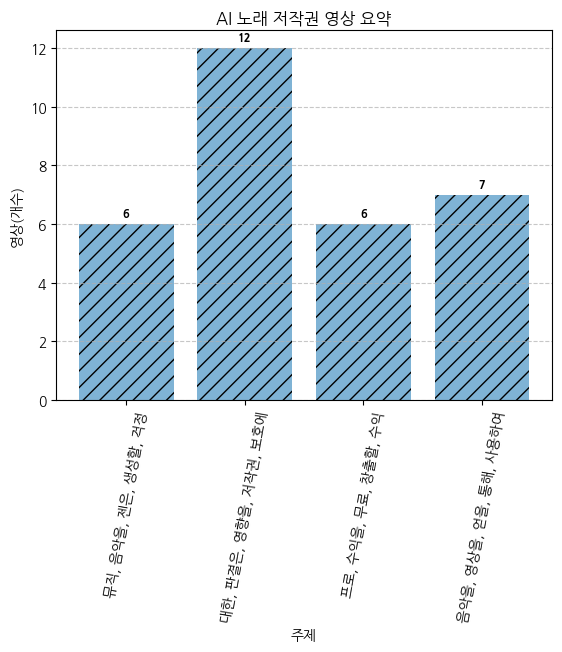

In [8]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 주어진 데이터
x = df.columns
y = df.loc[0]

# 그래프 그리기
plt.bar(x, y, color='#7FB3D5', hatch='//')  # 색상을 온화한 파란색으로 지정하고 hatch를 추가하여 실선 모양으로 만듦
plt.xlabel('주제')  # x축 레이블 변경
plt.ylabel('영상(개수)')  # y축 레이블 변경
plt.title('AI 노래 저작권 영상 요약')  # 그래프 제목 변경
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 그리드 적용
plt.xticks(range(1, 5), topic_list, rotation=80)

# 그래프에 수치 표시
for i, v in enumerate(y, start=1):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.show()


In [9]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [11]:
#pip install googletrans==4.0.0-rc1
from googletrans import Translator
import nltk
nltk.download('vader_lexicon')  # VADER Lexicon 다운로드
total_list=[]
def translate_list_elements(input_list, target_language='en'):
    translator = Translator()
    translation_result = []

    for element in input_list:
        translation = translator.translate(element, dest=target_language).text
        translation_result.append({element: translation})

    return translation_result

# 예시 리스트
#original_list = data_list[0:20]

# 번역 실행
for i in summary_list:
    translated_dict_list = translate_list_elements([i])
    total_list.append(translated_dict_list)
# # 결과 출력
# for translation_dict in translated_dict_list:
#     print(translation_dict)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
emotional_result=dict()
for i in total_list:
    if swn_polarity(list(i[0].values())[0]) :
        emotional_result.setdefault(list(i[0].items())[0][0], "1")
    else :
        emotional_result.setdefault(list(i[0].items())[0][0], "0")

In [31]:
import pandas as pd
df = pd.DataFrame(emotional_result.items(), columns=['title', 'result'])

In [32]:
result=df["result"].value_counts()

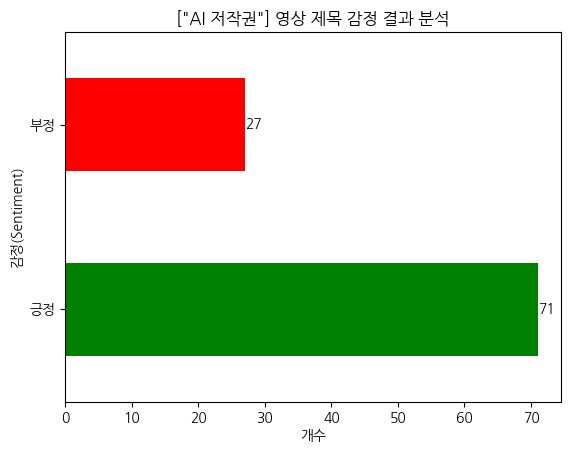

In [34]:
import matplotlib.pyplot as plt

# 주어진 Series
result_series = result

# 그래프 그리기
colors = ['green', 'red']  # 긍정은 녹색, 부정은 빨강색
ax = result_series.plot(kind='barh', color=colors)

plt.xlabel('개수')
plt.ylabel('감정(Sentiment)')
plt.yticks(range(2),["긍정","부정"])
plt.title('["AI 저작권"] 영상 제목 감정 결과 분석')

# 각 막대 위에 값 표시
for index, value in enumerate(result_series):
    plt.text(value, index, str(value), va='center')

plt.show()


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen(url_list[0])
bs=BeautifulSoup(html,"html.parser")
bs.find_all("div", class_="glarity--content") # 익스텐션 사용이 불가능하다


[]

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
driver.get(url_list[0])

In [ ]:
time.sleep(15)
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time

# 사용자 정보 설정
username = "mathnoah@naver.com"
password = "dddd"

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

driver = webdriver.Chrome(options=chrome_options)
driver.get("https://www.youtube.com/")

# 로그인 버튼 찾기 및 클릭
login_button = driver.find_element(By.XPATH,'//*[@id="buttons"]/ytd-button-renderer/yt-button-shape/a')
login_button.click()

# 로그인 정보 입력
time.sleep(2)
username_input = driver.find_element(By.ID, "identifierId")
username_input.send_keys(username)
username_input.send_keys(Keys.RETURN)

time.sleep(2) # 비번 입력에서 막힘;;
password_input = driver.find_element(By.NAME, "Passwd")
password_input.send_keys(password)
password_input.send_keys(Keys.RETURN)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[name="Passwd"]"}
  (Session info: chrome-headless-shell=121.0.6167.185)


In [ ]:
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup
melon_url = 'https://www.youtube.com/'
# HTTP request 패킷 생성: Request()
urlrequest = Request(melon_url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(urlrequest)
soup = BeautifulSoup(html.read().decode('utf-8'), 'html.parser')
print(soup)

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="ko-KR" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><script data-id="_gd" nonce="GqcLGc6bsSS1xopIawr62w">window.WIZ_global_data = {"MuJWjd":false,"nQyAE":{},"oxN3nb":{"1":false}};</script><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ==" http-equiv="origin-trial"/><script nonce="GqcLGc6bsSS1xopIawr62w">var ytcfg={d:function(){return window.yt&&yt.config_||ytcfg.data_||(ytcfg.data_={})},get:function(k,o){return k in ytcfg.d()?ytcfg.d()[k]:o},set:function(){var a=arguments;if(a.length>1)ytcfg.d()[a[0]]=a[1];else{var k;for(k in a[0])ytcfg.d()[k]=a[0][k]}}};
window.ytcfg.set('EME